# Dataset Description

-  Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

-  Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

-  Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

-  Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

-  Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

-  Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

-  Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

-  Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

-  Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

-  Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

-  Price: Target variable stores information of the ticket price.

# Imports Library

In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest ,f_regression,mutual_info_regression,SelectPercentile
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,StratifiedKFold,validation_curve,GridSearchCV,learning_curve,train_test_split
from sklearn.model_selection import 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Clean_Dataset.csv')
df1=pd.read_csv('Clean_Dataset.csv')
df2=pd.read_csv('Clean_Dataset.csv')

In [12]:
df.columns

Index(['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [13]:
df.shape

(300153, 12)

In [14]:
df.dtypes

id                    int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [15]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [17]:
info_df = pd.DataFrame(df.dtypes)
info_df['missing_value'] = df.isnull().sum()
info_df

,0,missing_value
id,int64,0
airline,object,0
flight,object,0
source_city,object,0
departure_time,object,0
stops,object,0
arrival_time,object,0
destination_city,object,0
class,object,0
duration,float64,0


In [18]:
df=df.drop(['id'],axis=1)
df1=df1.drop(['id'],axis=1)
df2=df2.drop(['id'],axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [19]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

# Predictive Power Score 
- 


Text(32.09374999999999, 0.5, 'target')

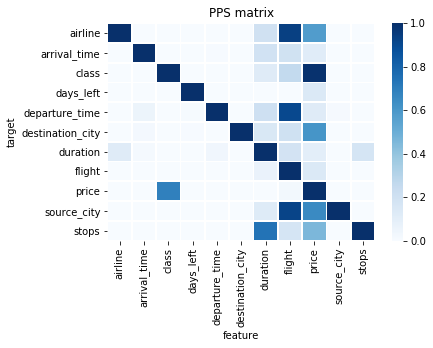

In [20]:
mat = pps.matrix(df)
mat = mat[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
ax = sns.heatmap(mat, vmin=0, vmax=1, cmap="Blues", linewidths=0.8)
ax.set_title("PPS matrix")
ax.set_xlabel("feature")
ax.set_ylabel("target")

In [21]:
pps.score(df, "class", "price")

{'x': 'class',
 'y': 'price',
 'ppscore': 0.6952601829007365,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 16350.5396,
 'model_score': 4982.660447178264,
 'model': DecisionTreeRegressor()}

In [22]:
pps.score(df, "price", "class")

{'x': 'price',
 'y': 'class',
 'ppscore': 0.9888893256489303,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.5684,
 'model_score': 0.9952046329500783,
 'model': DecisionTreeClassifier()}

 ***-  symmetric correlation between "price"  and  "class" it is a two side relation***

In [23]:
pps.score(df, "price", "source_city")

{'x': 'price',
 'y': 'source_city',
 'ppscore': 0.6526316675282499,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.174,
 'model_score': 0.7130737573783344,
 'model': DecisionTreeClassifier()}

In [24]:
pps.score(df, "source_city", "price")

{'x': 'source_city',
 'y': 'price',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 16350.5396,
 'model_score': 19886.8927497212,
 'model': DecisionTreeRegressor()}

 ***- an asymmetric correlation between "price"  and  "source_city" it is a one side relation***

In [25]:
pps.score(df, "flight", "price")

{'x': 'flight',
 'y': 'price',
 'ppscore': 0.027083073004888214,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 16350.5396,
 'model_score': 15907.716742343884,
 'model': DecisionTreeRegressor()}

***- week correlation between "price" and "flight"***

In [26]:
df=df.drop(['flight'],axis=1)
df1=df1.drop(['flight'],axis=1)
df2=df2.drop(['flight'],axis=1)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data Distribution and Visulization

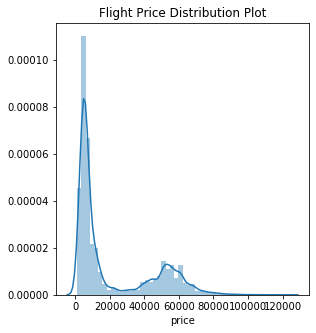

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Flight Price Distribution Plot')
sns.distplot(df.price)


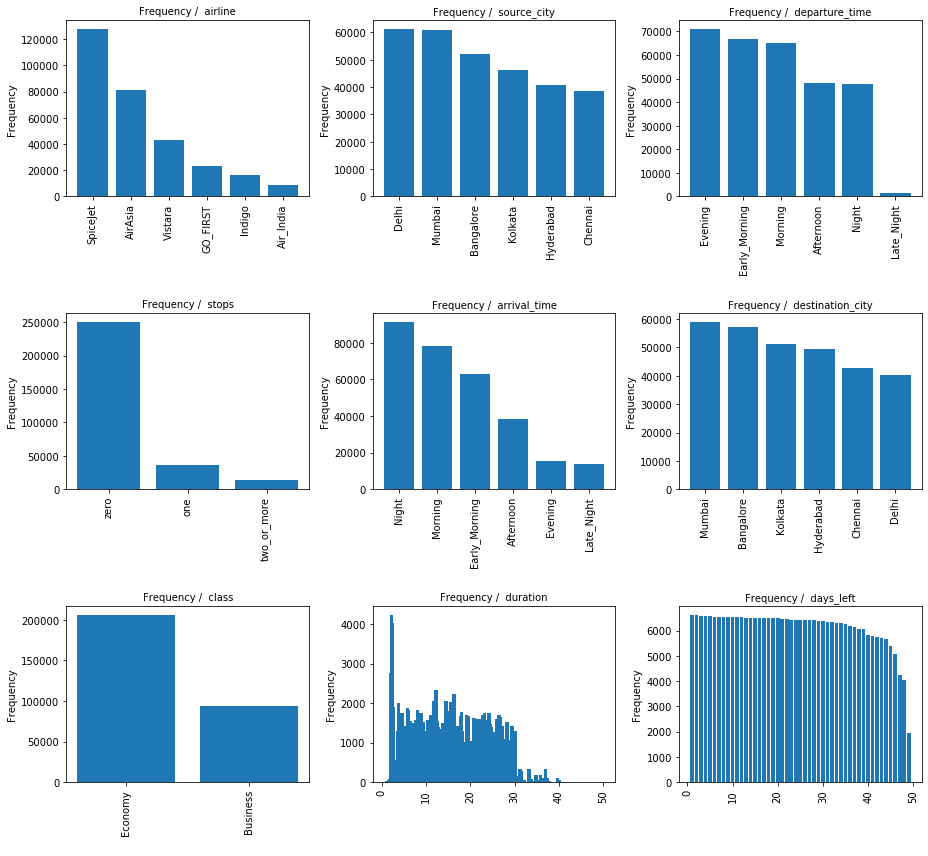

In [49]:
culomns =  ['airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       ]

def data_values_frequency(list_=[]):
    
    fig = plt.figure(figsize=(13,12))
    for i,val in enumerate(list_):
        fig.add_subplot(3, 3,i+1)
        plt.bar(df[val].unique(), df[val].value_counts())
        plt.title("Frequency /  "+str(val), fontsize=10)
        plt.xlabel(" ")
        plt.ylabel("Frequency")
        plt.xticks(rotation = 'vertical')
        fig.tight_layout()
        fig.show()
        
        
data_values_frequency(culomns)

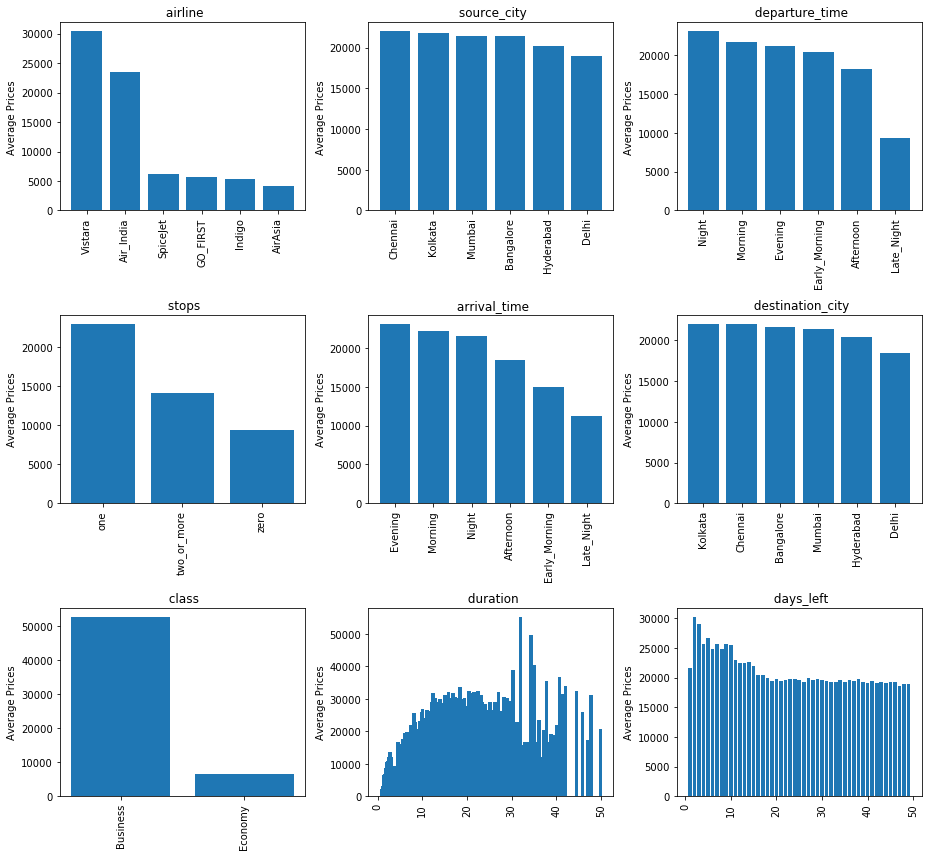

In [50]:


def data_distribution_with_target(list_=[]):
    fig=plt.figure(figsize =(13,12))
    for i,val in enumerate(list_):
        c = df.groupby(val)['price'].mean().round(0).sort_values(ascending = False)
        fig.add_subplot(3, 3,i+1)
        plt.bar(c.index, c.values)
        plt.title(" "+str(list_[i]))
        plt.xlabel("")
        plt.ylabel("Average Prices")
        plt.xticks(rotation = 'vertical')
        fig.tight_layout()
        fig.show()
        
data_distribution_with_target(culomns)


# Feature Representation

****- represent Categorical Variables****

In [28]:
label_encoder = LabelEncoder()

def encoding(df):
    df['airline']= label_encoder.fit_transform(df['airline'])
    df['source_city']= label_encoder.fit_transform(df['source_city'])
    df['departure_time'] = label_encoder.fit_transform(df['departure_time'])
    df['stops']= label_encoder.fit_transform(df['stops'])
    df['arrival_time']  = label_encoder.fit_transform(df['arrival_time'])
    df['destination_city']= label_encoder.fit_transform(df['destination_city'])
    df['class']  = label_encoder.fit_transform(df['class'])
encoding(df)
encoding(df1)
encoding(df2)

In [29]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [30]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.104873,2.577592,2.417337,0.284168,3.074086,2.588303,0.688536,12.221021,26.004751,20889.660523
std,1.833265,1.751762,1.754276,0.665825,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


  # Detect outliers

***- Detect Univariate Outliers***
- as we can see that the price mean larger than many values in the column when comparing with minimum value
- lets using InterQuartile range (IQR) technique : This method can be used to find the maximum and minimum values of data points that are outliers by calculating the boundaries.

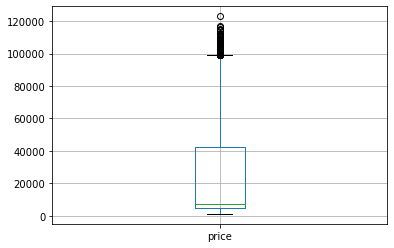

In [31]:
df.boxplot(column='price')

- we can see that outliers when price above 100,000

In [32]:

#The first quartile denoted by Q1 is the median of the lower half of the data set. 
#the third quartile, denoted by Q3 is the median of the upper half of the data set.
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
print("Q1 ",Q1,"  Q2 ",Q3,"  IQR ",IQR)

Q1  4783.0   Q2  42521.0   IQR  37738.0


In [33]:
d=df[np.logical_or(df['price'] < (Q1 - 1.5 * IQR), df['price'] > (Q3 + 1.5 * IQR))]
d

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,5,2,2,1,2,4,0,21.08,1,114434
215859,5,2,2,1,2,4,0,21.08,1,116562
216025,5,2,2,1,4,4,0,17.58,4,100395
216094,5,2,4,0,2,4,0,6.50,5,99129
216095,5,2,4,0,2,4,0,8.00,5,101369
...,...,...,...,...,...,...,...,...,...,...
293474,5,1,4,0,5,0,0,9.67,3,107597
296001,5,1,5,0,4,4,0,11.50,3,102832
296081,5,1,1,0,5,4,0,15.83,5,102384
296170,5,1,5,0,4,4,0,11.50,7,104624


In [34]:
df.drop(d.index.to_list(), axis=0, inplace=True)
df1.drop(d.index.to_list(), axis=0, inplace=True)
df2.drop(d.index.to_list(), axis=0, inplace=True)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


***-  Detect Multivariate Outliers***

- try using EllipticEnvelope() for detect outliers ,which An object for detecting outliers in a Gaussian distributed dataset. 
- try using LocalOutlierFactor() for detect outliers ,which Unsupervised Outlier Detection ,It measures the local deviation of the density of a given sample with respect to its neighbors.


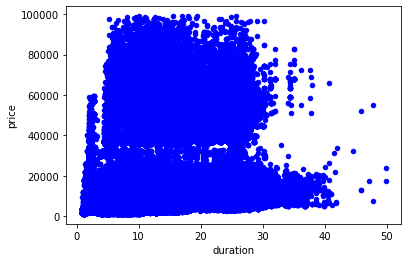

In [35]:
df.plot(kind="scatter",x="duration",y="price",alpha=1 ,color="blue")


- plotting scatter between two features to see outliers

In [36]:
#sns.pairplot(df,hue="species",palette="hls")

In [37]:
#df1=df.copy()

elpenv = EllipticEnvelope(contamination=0.035, random_state=0)
# Returns 1 of inliers, -1 for outliers
pred = elpenv.fit_predict(df1)

outlier_index = np.where(pred==-1)
outlier_values = df1.index[outlier_index[0]]


In [38]:
df1.drop(outlier_values, axis=0, inplace=True)


In [39]:
df1.shape

(289528, 10)

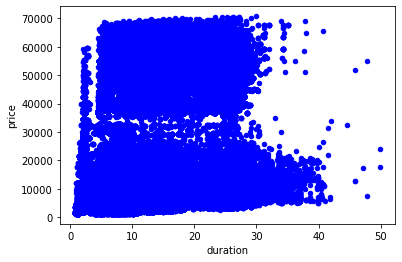

In [40]:
df1.plot(kind="scatter",x="duration",y="price",alpha=1 ,color="blue")


In [41]:

#df2=df.copy()

lof = LocalOutlierFactor()

# Returns 1 of inliers, -1 for outliers
pred = lof.fit_predict(df2)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = df2.index[outlier_index[0]]


In [42]:
df2.drop(outlier_values, axis=0, inplace=True)


In [43]:

df2.shape

(291032, 10)

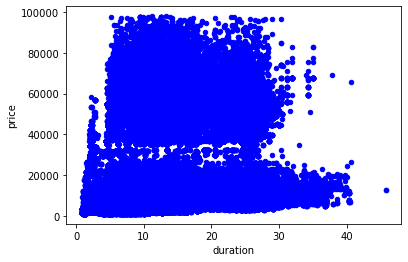

In [44]:
df2.plot(kind="scatter",x="duration",y="price",alpha=1 ,color="blue")


- we can see that LocalOutlierFactor() with default parameters was better than EllipticEnvelope() , so we will depend on its results

# Feature Selection
- is the process of reducing the number of input variables when developing a predictive model.
- It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

 ****" ``Removing Features With Low Variance (Low Variance Filter)`` "**** 

- Simple baseline approach to feature selection. It removes all features whose variance doesn't meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in 80% of samples.

In [45]:
x=df2.drop('price' , axis=1)
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300146,1,1,1,0,4,3,0,26.83,49
300148,5,1,4,0,2,3,0,10.08,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [46]:
y=df2['price']
y


0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300146    51345
300148    69265
300150    79099
300151    81585
300152    81585
Name: price, Length: 291032, dtype: int64

In [47]:
variance = df2.var()
variance

airline             3.358641e+00
source_city         3.071821e+00
departure_time      3.078428e+00
stops               4.440220e-01
arrival_time        3.023574e+00
destination_city    3.041187e+00
class               2.141576e-01
duration            5.081284e+01
days_left           1.817574e+02
price               5.079958e+08
dtype: float64

In [48]:
variable = [ ]
threshold=(.8 * (1 - .8))
for i in range(0,len(variance)-1):
    if variance[i]>=threshold: 
        variable.append(x.columns[i])
        
variable

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

- all features with heigh variance ***!!*** does all necessary ***???***   lets check another technique





  ****" ``Univariate Feature Selection`` "****

- ``Univariate feature selection`` works by selecting the best features based on univariate statistical tests. 
- try using SelectPercentile() which, removes all but a user-specified highest scoring percentage of features
- try using SelectKBest() which, removes all but the k highest scoring features\

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

In [49]:

X=x.to_numpy()
y=df2['price'].values

select = SelectKBest(score_func=f_regression,k=7)
z = select.fit_transform(X,y)
filter_ = select.get_support()
features = np.array(x.columns)

print(features[filter_])


['airline' 'departure_time' 'stops' 'arrival_time' 'class' 'duration'
 'days_left']


In [51]:

select = SelectPercentile(score_func=f_regression, percentile=80)
z = select.fit_transform(X,y)

filter_ = select.get_support()
features = np.array(x.columns)
feature_name=features[filter_]
print(feature_name)



['airline' 'departure_time' 'stops' 'arrival_time' 'class' 'duration'
 'days_left']


- so we well train our models on the best 7 feature selsected 

# Data splitting 

In [53]:
#X=x.to_numpy()
y=np.array(df2['price'].values).reshape(y.shape[0],1)

X_train, X_test, y_train, y_test = train_test_split(z, y,test_size=0.2,shuffle=True)


In [54]:
print("x train shape ",X_train.shape , "   y train shape  ",y_train.shape)
print("x test shape ",X_test.shape , "   y test shape  ",y_test.shape)


x train shape  (232825, 7)    y train shape   (232825, 1)
x test shape  (58207, 7)    y test shape   (58207, 1)


# Data scaling 
- Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing.

- The `` MinMaxScaler `` shifts the data such that all features are exactly between 0 and 1.

In [55]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMaxScaled = scaler.transform(X_train)
X_test_MinMaxScaled= scaler.transform(X_test)

In [56]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_StandardScaled = scaler.transform(X_train)
X_test_StandardScaled = scaler.transform(X_test)


# Modeling 

- we will trying to train each of the following ml models `` [LinearRegression() , Laso( ) , KNeighborsRegressor( ) ,LinearSVR( ) , RandomForestRegressor( )] `` on our preprocessed data once ,second on the same preprocessed data with normilized using (MinMaxScaled()) ,third on the same preprocessed data with standrized using (StandardScaler()) , and for each model we will fine tuning the best important parameters for it ,then plotting it's learning curve ,and it's validation curve with the fine tuning parameter , and visulizing it's important features , finally we will test cross validation on our best model .

In [62]:
def model_evaluation(model,x,y,training_data=True):
    if training_data:
        print("model score on training data", model.score(x,y))
    else :
        print("model score on testing data", model.score(x,y))
        
def feature_importance(model):
    plt.barh(range(X_train.shape[1]), model.feature_importances_, align='center')
    plt.yticks(np.arange(X_train.shape[1]), feature_name)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()
    
def plot_validation_curve(model,X,y,param_name,param_range,ylim=None):
    train_score, val_score = validation_curve(model, X, y,
                                          param_name= param_name,
                                          param_range = param_range,
                                          cv=7)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
    plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
    plt.legend(loc='best')
    #plt.ylim(0.8, 1)
    plt.xlabel('degree')
    plt.ylabel('score');
    


    
def plot_learning_curve(model, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean , train_scores_mean , alpha=0.01,color="r")
    plt.fill_between(train_sizes, test_scores_mean ,test_scores_mean , alpha=0.01, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt 


def fine_tuning(model,X_train , y_train,parameter_name,parameter_values):
    param_grid = [{parameter_name: parameter_values}]
    grid = GridSearchCV(model, param_grid, cv=7)
    grid.fit(X_train , y_train)
    print("best_params_ ",grid.best_params_)
    return grid.best_estimator_ 

1 - **LinearRegression( )** with  ``preprocessing data``

In [279]:
model1 = LinearRegression()
model1.fit(X_train,y_train)


LinearRegression()

In [280]:
model_evaluation(model1,X_train,y_train,training_data=True)
model_evaluation(model1,X_test,y_test,training_data=False)


model score on training data 0.9073078933144598
model score on testing data 0.9068602441168212


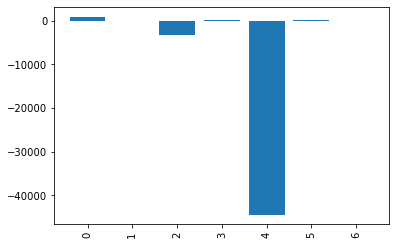

In [281]:
importance = model1.coef_
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.xticks(rotation=90)
plt.show()

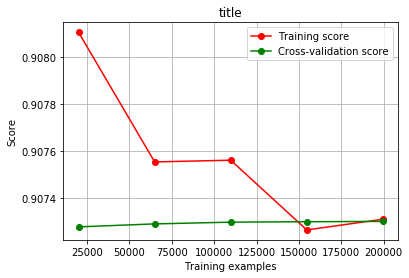

In [282]:
plot_learning_curve(model1, "title", X_train, y_train, ylim=None, cv=7,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

2 - **LinearRegression( )** with  ``preprocessing and normalized data``

In [283]:
model2 = LinearRegression()
model2.fit(X_train_MinMaxScaled,y_train)


LinearRegression()

In [284]:
model_evaluation(model2,X_train_MinMaxScaled,y_train,training_data=True)
model_evaluation(model2,X_test_MinMaxScaled,y_test,training_data=False)


model score on training data 0.9073078933144598
model score on testing data 0.906860244116821


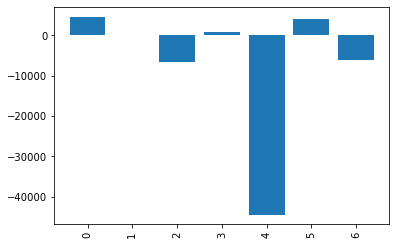

In [285]:
importance = model2.coef_
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.xticks(rotation=90)
plt.show()

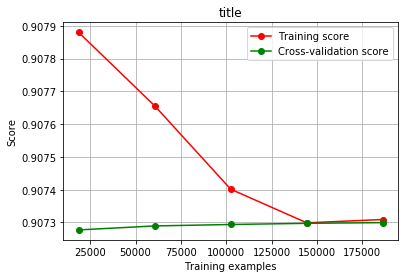

In [286]:
plot_learning_curve(model2, "title", X_train_MinMaxScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

3 - **LinearRegression( )** with  ``preprocessing and standarized data``

In [287]:
model3 = LinearRegression()
model3.fit(X_train_StandardScaled,y_train)


LinearRegression()

In [288]:
model_evaluation(model3,X_train_StandardScaled,y_train,training_data=True)
model_evaluation(model3,X_test_StandardScaled,y_test,training_data=False)


model score on training data 0.9073078933144598
model score on testing data 0.9068602441168219


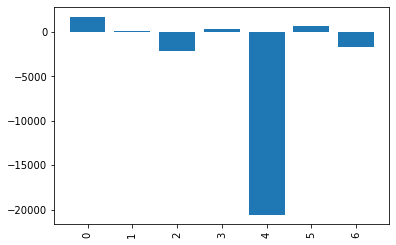

In [289]:
importance = model3.coef_
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.xticks(rotation=90)
plt.show()

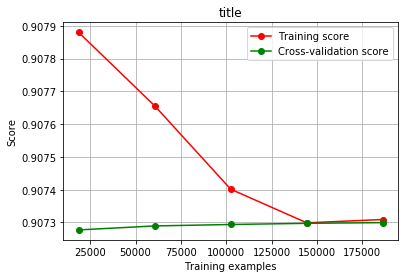

In [290]:
plot_learning_curve(model3, "title", X_train_StandardScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

4 - **Laso( )**  regression with  ``preprocessing data and fine tuning alpha parameter``

In [291]:
alphas=[0.05,0.1,0.2,0.3,0.5, 1, 2, 3, 5, 10]

model4=fine_tuning(Lasso(max_iter=10000),X_train , y_train,'alpha',alphas)


best_params_  {'alpha': 0.1}


In [292]:
model_evaluation(model4,X_train , y_train,training_data=True)
model_evaluation(model4,X_test,y_test,training_data=False)


model score on training data 0.907307893165394
model score on testing data 0.9068602374534609


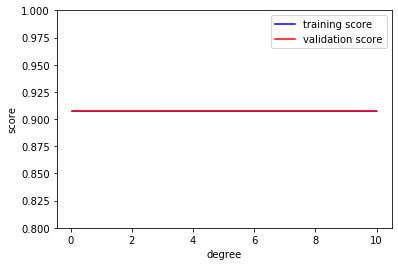

In [293]:
plot_validation_curve(model4,X_train , y_train,'alpha',alphas)

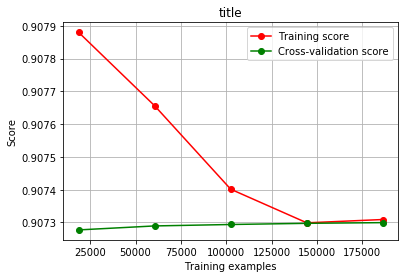

In [294]:

plot_learning_curve(model4, "title", X_train, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

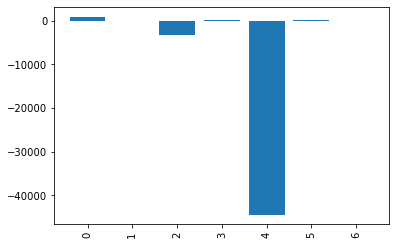

In [295]:
importance = model4.coef_
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

5 - **Laso( )**  regression with  ``preprocessing and normalized data and fine tuning alpha parameter``

In [296]:
model5=fine_tuning(Lasso(max_iter=10000),X_train_MinMaxScaled,y_train,'alpha',alphas)


best_params_  {'alpha': 0.05}


In [297]:
model_evaluation(model5,X_train_MinMaxScaled,y_train,training_data=True)
model_evaluation(model5,X_test_MinMaxScaled,y_test,training_data=False)


model score on training data 0.9073078929619254
model score on testing data 0.9068602530566011


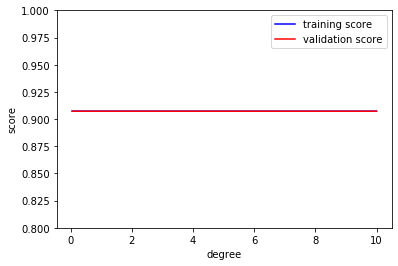

In [298]:
plot_validation_curve(model5,X_train_MinMaxScaled,y_train,'alpha',alphas)

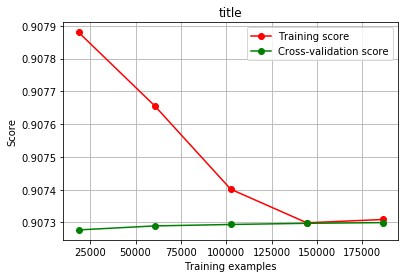

In [299]:

plot_learning_curve(model5, "title", X_train_MinMaxScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

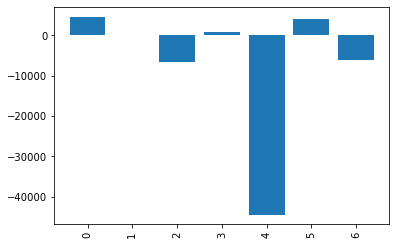

In [300]:
importance = model5.coef_
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

6 - **Laso( )**  regression with  ``preprocessing and standraized data and fine tuning alpha parameter``

In [301]:
model6=fine_tuning(Lasso(max_iter=10000),X_train_StandardScaled,y_train,'alpha',alphas)


best_params_  {'alpha': 0.05}


In [302]:
model_evaluation(model6,X_train_StandardScaled,y_train,training_data=True)
model_evaluation(model6,X_test_StandardScaled,y_test,training_data=False)


model score on training data 0.9073078932880507
model score on testing data 0.9068602456248712


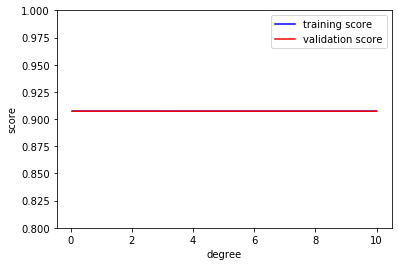

In [303]:
plot_validation_curve(model6,X_train_StandardScaled,y_train,'alpha',alphas)

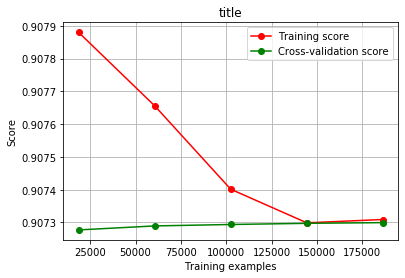

In [306]:
plot_learning_curve(model6, "title", X_train_StandardScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

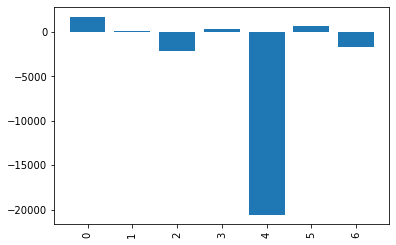

In [307]:
importance = model6.coef_
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

7 - **KNeighborsRegressor( )** with ``preprocessing data and fine tuning n_neighbors parameter``


In [308]:
n_neighbors=[1,2,3,4,5,6,7]
model7=fine_tuning(KNeighborsRegressor(),X_train,y_train,'n_neighbors',n_neighbors)


best_params_  {'n_neighbors': 4}


In [309]:
model_evaluation(model7,X_train,y_train,training_data=True)
model_evaluation(model7,X_test,y_test,training_data=False)


model score on training data 0.954022751536718
model score on testing data 0.9224744466129339


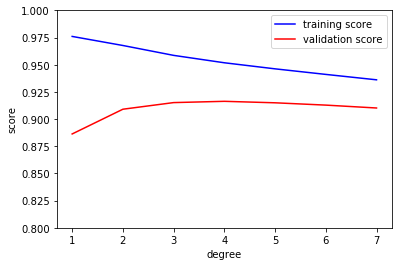

In [310]:
plot_validation_curve(model7,X_train,y_train,'n_neighbors',n_neighbors)

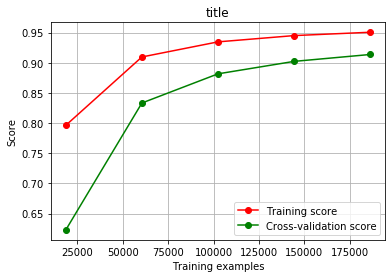

In [311]:
plot_learning_curve(model7, "title", X_train, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

In [241]:
#feature_importance(model)

8 - **KNeighborsRegressor( )** with ``preprocessing and normalized data and fine tuning n_neighbors parameter``


In [312]:
n_neighbors=[1,2,3,4,5,6,7]

model8=fine_tuning(KNeighborsRegressor(),X_train_MinMaxScaled,y_train,'n_neighbors',n_neighbors)


best_params_  {'n_neighbors': 7}


In [313]:
model_evaluation(model8,X_train_MinMaxScaled,y_train,training_data=True)
model_evaluation(model8,X_test_MinMaxScaled,y_test,training_data=False)


model score on training data 0.9608068495053508
model score on testing data 0.9469822283626499


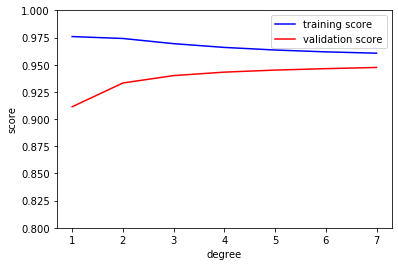

In [314]:
plot_validation_curve(model8,X_train_MinMaxScaled,y_train,'n_neighbors',n_neighbors)

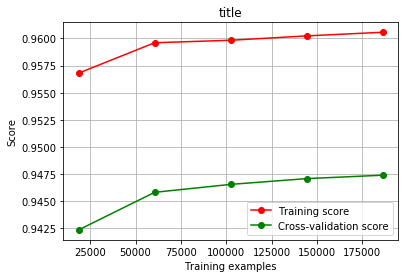

In [315]:
plot_learning_curve(model8, "title", X_train_MinMaxScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

9 - **KNeighborsRegressor( )** with ``preprocessing and standraized data and fine tuning n_neighbors parameter``


In [317]:
model9=fine_tuning(KNeighborsRegressor(),X_train_StandardScaled,y_train,'n_neighbors',n_neighbors)


best_params_  {'n_neighbors': 7}


In [318]:
model_evaluation(model9,X_train_StandardScaled,y_train,training_data=True)
model_evaluation(model9,X_test_StandardScaled,y_test,training_data=False)


model score on training data 0.9622948944912322
model score on testing data 0.9488386403971236


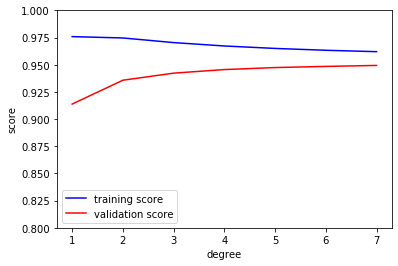

In [319]:
plot_validation_curve(model9,X_train_StandardScaled,y_train,'n_neighbors',n_neighbors)

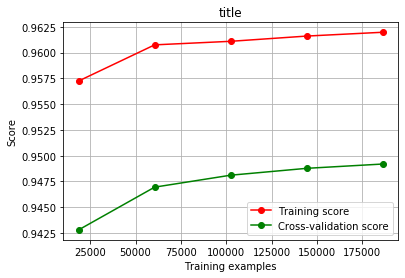

In [320]:
plot_learning_curve(model9, "title", X_train_StandardScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

10 - **LinearSVR( )** with ``preprocessing data and fine tuning epsilon parameter``


In [321]:
epsilon=[0.02,0.05,0.1,0.2,0.3,0.5,1,1.5,2]
model10=fine_tuning(LinearSVR( random_state=42),X_train,y_train,'epsilon',epsilon)

best_params_  {'epsilon': 0.1}


In [322]:
model_evaluation(model10,X_train,y_train,training_data=True)
model_evaluation(model10,X_test,y_test,training_data=False)


model score on training data 0.7715674414049858
model score on testing data 0.7710444484705099


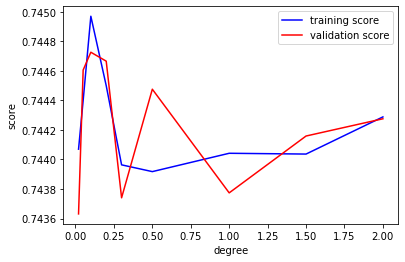

In [334]:
plot_validation_curve(model10,X_train,y_train,'epsilon',epsilon)

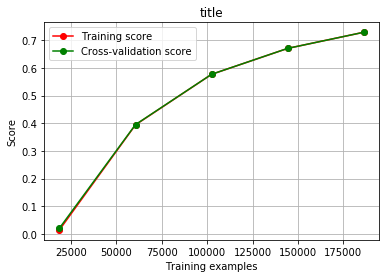

In [324]:
plot_learning_curve(model10, "title", X_train, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

11 - **LinearSVR( )** with ``preprocessing and normalized data and fine tuning epsilon parameter``


In [325]:
model11=fine_tuning(LinearSVR( random_state=42),X_train_MinMaxScaled,y_train,'epsilon',epsilon)

best_params_  {'epsilon': 1}


In [326]:
model_evaluation(model11,X_train_MinMaxScaled,y_train,training_data=True)
model_evaluation(model11,X_test_MinMaxScaled,y_test,training_data=False)


model score on training data 0.7586700286595294
model score on testing data 0.7582439290134964


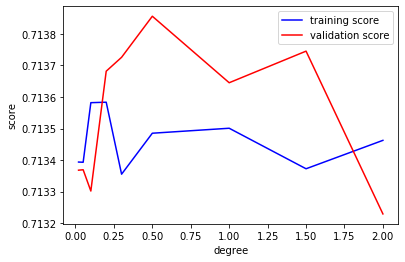

In [335]:
plot_validation_curve(model11,X_train_MinMaxScaled,y_train,'epsilon',epsilon)

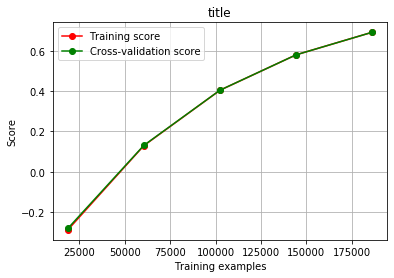

In [328]:
plot_learning_curve(model11, "title", X_train_MinMaxScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

12 - **LinearSVR( )** with ``preprocessing and standarized data and fine tuning epsilon parameter``


In [329]:
model12=fine_tuning(LinearSVR( random_state=42),X_train_StandardScaled,y_train,'epsilon',epsilon)

best_params_  {'epsilon': 0.5}


In [330]:
model_evaluation(model12,X_train_StandardScaled,y_train,training_data=True)
model_evaluation(model12,X_test_StandardScaled,y_test,training_data=False)


model score on training data 0.8994375043334754
model score on testing data 0.8989199171259526


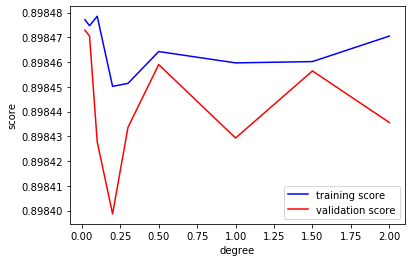

In [336]:
plot_validation_curve(model12,X_train_StandardScaled,y_train,'epsilon',epsilon)

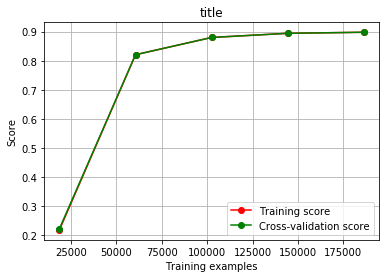

In [332]:
plot_learning_curve(model12, "title", X_train_StandardScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

16 -**RandomForestRegressor()**  with ``preprocessing fine tuning hyperparameter``

In [57]:
from sklearn.model_selection import RandomizedSearchCV

model16 = RandomForestRegressor(max_features= 'auto')
                                
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 800, num = 6)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 25, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [ 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]



random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = model16, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)




rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25, total= 4.3min
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25, total= 4.0min
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25, total= 4.3min
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25, total= 4.3min
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_depth=25, total= 4.3min
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_depth=25 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_depth=25, total= 4.4min
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_depth=25 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_depth=25, total= 4.7min
[CV] n_estimators=600, min_samples_split=15, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 222.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [300, 400, 500, 600,
                                                         700, 800]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_depth': 25}

In [66]:
model16=rf_random.best_estimator_

In [67]:
model_evaluation(model16 ,X_train,y_train,training_data=True)
model_evaluation(model16 ,X_test,y_test,training_data=False)


model score on training data 0.9769395487191951
model score on testing data 0.9697668178797184


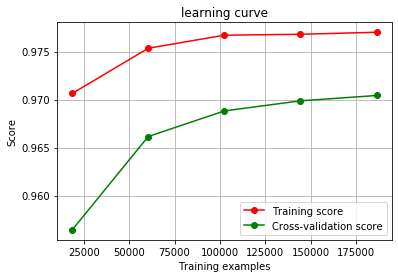

In [68]:
plot_learning_curve(model16, "learning curve", X_train, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

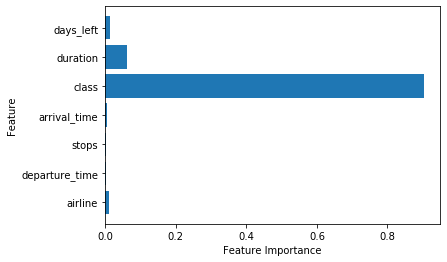

In [69]:
feature_importance(model16)

17 -**RandomForestRegressor()**  with ``preprocessing and minimized data ,using last hyperparameters with fine tuning parameter ``

In [70]:
model17 = RandomForestRegressor(max_features= 'auto',n_estimators= 600,min_samples_split= 15,
 min_samples_leaf= 5,max_depth= 25)

model17.fit(X_train_MinMaxScaled, y_train)


RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=15,
                      n_estimators=600)

In [71]:
model_evaluation(model17 ,X_train_MinMaxScaled,y_train,training_data=True)
model_evaluation(model17 ,X_test_MinMaxScaled,y_test,training_data=False)


model score on training data 0.976947388931774
model score on testing data 0.9697789100957669


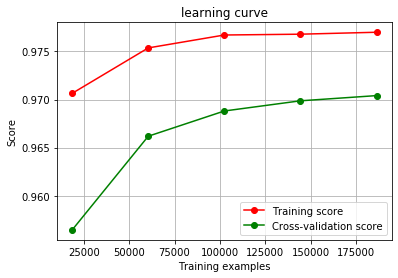

In [72]:
plot_learning_curve(model17, "learning curve", X_train_MinMaxScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

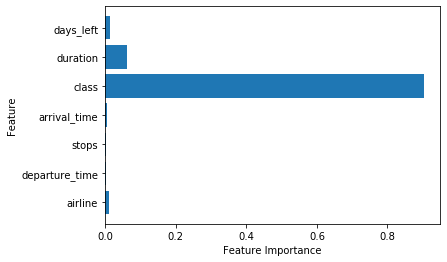

In [73]:
feature_importance(model17)

18 -**RandomForestRegressor()**  with ``preprocessing and standarized data ,using last hyperparameters with fine tuning parameter ``

In [75]:
model18 = RandomForestRegressor(max_features= 'auto',n_estimators= 600,min_samples_split= 15,
 min_samples_leaf= 5,max_depth= 25)

model18.fit(X_train_StandardScaled, y_train)


RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=15,
                      n_estimators=600)

In [76]:
model_evaluation(model18 ,X_train_StandardScaled,y_train,training_data=True)
model_evaluation(model18 ,X_test_StandardScaled,y_test,training_data=False)


model score on training data 0.976947565161066
model score on testing data 0.9697825701864587


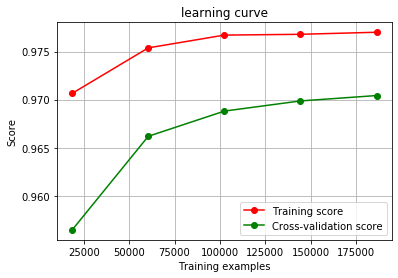

In [77]:
plot_learning_curve(model18, "learning curve", X_train_StandardScaled, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

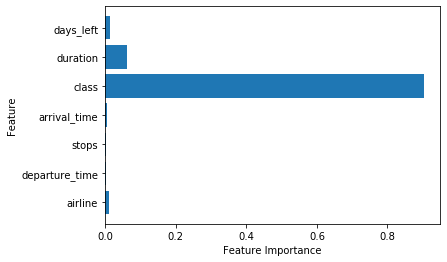

In [78]:
feature_importance(model18)

- we say that , we will test cross validation on the best model to check if it's results are the same on all subsets of data but , the best model was RandomForestRegressor() and there is no need for cross-validation or a separate test set to get an unbiased estimate of the test set error. It is estimated internally, during the run, as follows: Each tree is constructed using a different bootstrap sample from the original data.


# conclusion

- in this project we train each of the following ml models `` [LinearRegression() , Laso( ) , KNeighborsRegressor( ) ,LinearSVR( ) , RandomForestRegressor( )] `` on Flight Price Prediction Dataset and we can show diffrent preprocessing methodes how effect on it's results , and we achive the best score (training 0.976947565161066% , testing 0.9697825701864587 %) using RandomForestRegressor() with preprocessed and Normalized after fine tuning it's hyperparameters.